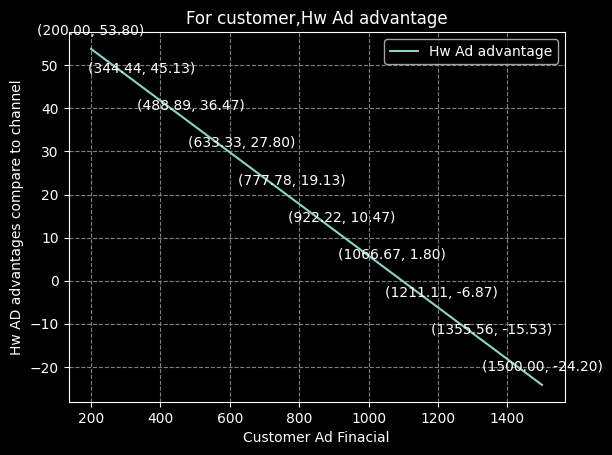

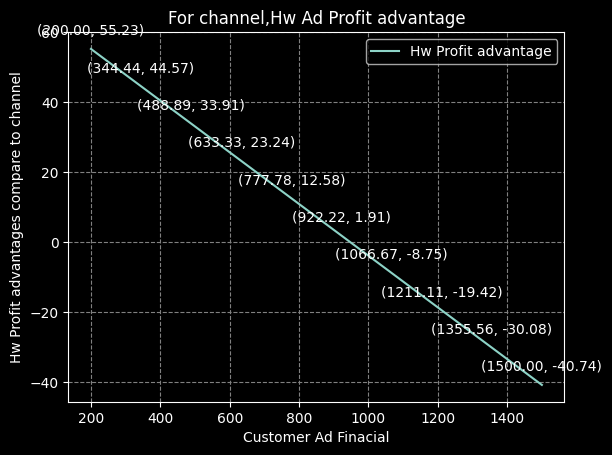

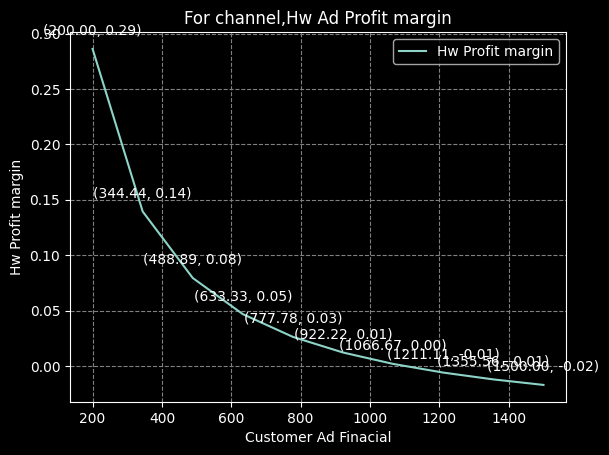

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# 函数1：用于生成用户侧投放曲线，显示结果为HW投放对比原投放模式利润点
def LineforCustomer(AdIn):
    # 生成x值范围,200到CustomerAd之间均分10个点位
    x = np.linspace(200, AdIn['CustomerAd'], 10)  
    # HW实际投放广告量
    HwAd = (x + AdIn['HwPut'] - AdIn['HwPlat']) * (1 - AdIn['HwCut']) 
    # 原渠道实际投放广告量
    QdAd = x * (1 - AdIn['ChanCut'])
    # 相同投放额度，HW侧对比原渠道差异
    y = HwAd - QdAd
    # 创建折线图
    plt.plot(x, y, label='Hw Ad advantage')

    # 添加标题和标签
    plt.title('For customer,Hw Ad advantage')
    plt.xlabel('Customer Ad Finacial')
    plt.ylabel('Hw AD advantages compare to channel')

    for i in range(len(x)):
        plt.annotate(f'({x[i]:.2f}, {y[i]:.2f})', (x[i], y[i]), textcoords="offset points", xytext=(0,10), ha='center')
    # 添加图例
    plt.legend()
    plt.grid(True,linestyle='--',color='gray')
    # 显示图形
    plt.show()

# 函数2：用于生成渠道侧投放曲线，显示结果为转HW投放对比原投放模式利润点
def LineforChannel(AdPro):
    # 生成x值范围,200到CustomerAd之间均分10个点位
    x = np.linspace(200, AdPro['CustomerAd'], 10)
    # 渠道自投产生的价值收益：抽佣加返点
    QdPro = x * AdPro['ChanCut'] + x * (1 - AdPro['ChanCut']) * AdPro['ChanRe']
    # 渠道走HW投流产生的价值收益：相同投流额度，HW模式省的钱
    HwPro = x - ((x * (1 - AdPro['ChanCut']))/(1 - AdPro['HwCut']) + AdPro['HwPlat'] - AdPro['HwPut'])
    # 走Hw通道价值收益优势
    y = HwPro - QdPro
    # 走Hw通道利润率
    yp = HwPro/x
    
    # 创建HW利润优势折线图
    plt.plot(x, y, label='Hw Profit advantage')
    # 添加标题和标签
    plt.title('For channel,Hw Ad Profit advantage')
    plt.xlabel('Customer Ad Finacial')
    plt.ylabel('Hw Profit advantages compare to channel')
    for i in range(len(x)):
        plt.annotate(f'({x[i]:.2f}, {y[i]:.2f})', (x[i], y[i]), textcoords="offset points", xytext=(0,10), ha='center')
    # 添加图例
    plt.legend()
    plt.grid(True,linestyle='--',color='gray')
    # 显示图形
    plt.show()

    # 创建HW通道利润率折线图
    plt.plot(x, yp, label='Hw Profit margin')
    # 添加标题和标签
    plt.title('For channel,Hw Ad Profit margin')
    plt.xlabel('Customer Ad Finacial')
    plt.ylabel('Hw Profit margin')
    for i in range(len(x)):
        plt.annotate(f'({x[i]:.2f}, {yp[i]:.2f})', (x[i], yp[i]), textcoords="offset points", xytext=(0,10), ha='center') 
    # 添加图例
    plt.legend()
    plt.grid(True,linestyle='--',color='gray')
    # 显示图形
    plt.show()

# HW侧抽成比例 HwCut ，HWCDP平台费用 HWPlat，补贴额度 HwPut
# 渠道侧返点比例 ChannelRebate
# 用户侧投放额度 CustomerAd
# 用户正常投放，渠道抽佣比例 ChannerCut
AdPara = {
    'HwCut' : 0.06,
    'HwPlat' : 30,
    'HwPut' : 100,
    'ChanRe' : 0.01,
    'CustomerAd' : 1500,
    'ChanCut' : 0.00
}

LineforCustomer(AdPara)
LineforChannel(AdPara)